In [2]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot, cat_emb

In [14]:
data = read_csv_data("../data/processed_job_postings_large_labeled.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level", "title_emb"], "standardized_annual_salary")
data = clean_location(data, 2)

import random
random.seed(70)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [15]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [16]:
# Attempt with basic MLP

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [float(target) for _, target in val_data])

In [17]:
from mlp import MLP, train_model
total_features = train_one_hot[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=100, output_size=1)  

In [18]:
train_model(model, train_one_hot, val_one_hot, 0.01, batch_size=500, num_epochs=10)

ZeroDivisionError: division by zero

In [19]:
# Attempt to add topic embedding to improve the model

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
temp = cat_emb(temp, train_data, 4)
train_one_hot_with_emb = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
temp = cat_emb(temp, val_data, 4)
val_one_hot_with_emb = MLPDataset(temp, [float(target) for _, target in val_data])

In [20]:
train_one_hot_with_emb[0][0].shape

torch.Size([701])

In [64]:
from mlp import MLP, train_model
total_features = train_one_hot_with_emb[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=500, output_size=1)  

Iter 50: Loss: 5942849024.0 Train mae 37549.96259765626, Validation mae 188206.4315861459
Iter 100: Loss: 1833520512.0 Train mae 29122.114035755203, Validation mae 179991.56223604167
Iter 150: Loss: 1505637376.0 Train mae 29760.797055255345, Validation mae 179849.69744889394
Iter 200: Loss: 2284538112.0 Train mae 28157.179855761708, Validation mae 178471.2282485384
Iter 250: Loss: 2126199296.0 Train mae 34443.03679767192, Validation mae 184414.58355191568
Iter 300: Loss: 2085812352.0 Train mae 35043.92168864584, Validation mae 185397.53833745435
Iter 350: Loss: 3129219072.0 Train mae 38035.7067202897, Validation mae 188148.1717122396
Iter 400: Loss: 2542370048.0 Train mae 33376.92737933593, Validation mae 183888.300567207
Iter 450: Loss: 2469461760.0 Train mae 30884.664167181, Validation mae 181282.34706082026
Iter 500: Loss: 225908048789504.0 Train mae 41601.824200143215, Validation mae 190998.2968326171
Iter 550: Loss: 2622249472.0 Train mae 41754.77760397785, Validation mae 191264.5

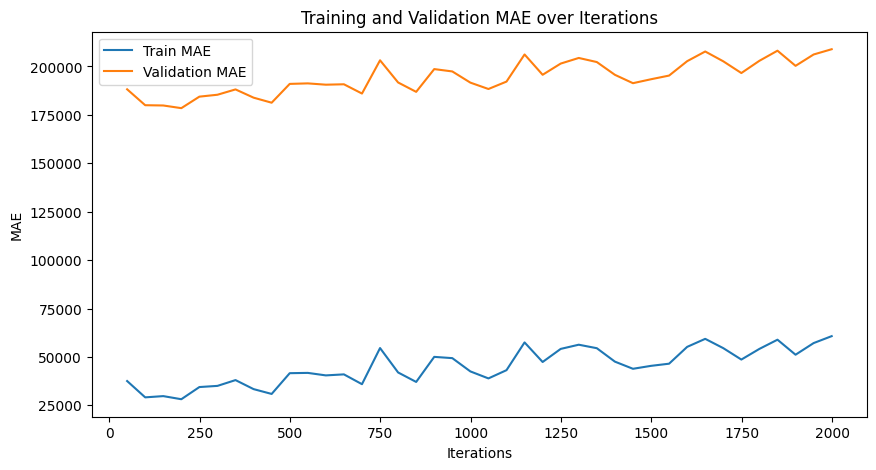

In [22]:
train_model(model, train_one_hot_with_emb, val_one_hot_with_emb, 0.01, batch_size=100, num_epochs=10)

In [23]:
train_data[-1]

([' Education And Schools',
  'FULL_TIME',
  'PA',
  '',
  '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [3]:
# Change to Categorical
data = read_csv_data("../data/processed_job_postings_large_labeled.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level", "title_emb"], "salary_level")
data = clean_location(data, 2)

import random
random.seed(70)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [4]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [5]:
import torch
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

targets = [data[i][1] for i in range(len(data))]

labels = ['10K-'] + [f"{i}K - {i + 10}K" for i in range(10, 150, 10)] + ['160K+']
label_to_int = {label: i for i, label in enumerate(labels)}

targets = list(map(lambda x: label_to_int[x], targets))

targets = torch.tensor(targets)

train_targets = targets[:20000]
val_targets = targets[20000:30000]
test_targets = targets[30000:]

In [6]:
train_targets

tensor([13,  3,  3,  ...,  5,  9,  3])

In [10]:
# Attempt with basic MLP

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [target.type(torch.LongTensor) for target in train_targets])



temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [target.type(torch.LongTensor) for target in val_targets])

In [11]:
from mlp import MLP, train_classifier
total_features = train_one_hot[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=100, output_size=len(labels))  

In [12]:
train_classifier(model, train_one_hot, val_one_hot, 0.01, batch_size=100, num_epochs=10)

RuntimeError: expected scalar type Long but found Float